# Kaggle House Prices - Fit Models

In [107]:
# Import libraries
import pandas as pd
import numpy as np
import statistics
import re
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(font_scale=1.5, style="ticks")
fs = (14, 6) # make the figure wider than the default

## Load and Groom the Data
* Load the data
* Fill 'NA's
* Correct data types

In [30]:
# Load the training data
houses = pd.read_csv("data/cleaned_data/cleaned_train.csv")

# Load the test data
# houses_test = pd.read_csv("data/cleaned_data/cleaned_test.csv")

houses.shape

(1460, 81)

In [31]:
# Override spurious NAs
# PoolQu
houses.PoolQC.fillna("NA", inplace=True)
#MiscFeature
houses.MiscFeature.fillna("NA", inplace=True)
#Alley
houses.Alley.fillna("NA", inplace=True)
# Fence
houses.Fence.fillna("NA", inplace=True)
# FireplaceQu
houses.FireplaceQu.fillna("NA", inplace=True)
# Garages
houses.GarageType.fillna("NA",inplace=True)
houses.GarageFinish.fillna("NA",inplace=True)
houses.GarageQual.fillna("NA",inplace=True)
houses.GarageCond.fillna("NA",inplace=True)
# Basements
houses.BsmtExposure.fillna("NA",inplace=True)
houses.BsmtFinType1.fillna("NA",inplace=True)
houses.BsmtFinType2.fillna("NA",inplace=True)
houses.BsmtQual.fillna("NA",inplace=True)
houses.BsmtCond.fillna("NA",inplace=True)
# Masonry
houses.MasVnrType.fillna("NA",inplace=True)
houses.MasVnrArea.fillna(0,inplace=True)
# What % data (if any) is missing for each column?
nulls = houses.isnull().sum()
nulls = pd.DataFrame(nulls)
nulls.rename(columns={0:"cnt_missing"},inplace=True)
nulls = nulls[nulls.cnt_missing>0]
nulls['pct_missing'] = round(nulls.cnt_missing/houses.shape[0] * 100,2)
nulls.sort_values(by="pct_missing",ascending=False)

,cnt_missing,pct_missing
GarageYrBlt,81,5.55
Electrical,1,0.07


In [49]:
# Drop the row missing the electrical data
houses = houses[houses.Electrical.isnull()==False]

(1460, 81)
(1459, 81)


In [32]:
# ExterQual
exterqual = {"Po" : 1, "Fa": 2, 'TA':3, 'Gd':4, 'Ex':5}
houses.ExterQual = houses.ExterQual.apply(lambda v: exterqual[v])
# ExterCond
extercond = {"Po" : 0, "Fa": 1, 'TA':2, 'Gd':3, 'Ex':4}
houses.ExterCond = houses.ExterCond.apply(lambda v: extercond[v])
# BsmtQual
basmtqual = {"NA":0, "Po" : 1, "Fa": 2, 'TA':3, 'Gd':4, 'Ex':5}
houses.BsmtQual = houses.BsmtQual.apply(lambda v: basmtqual[v])
# BsmtCond
basmtcond = {"NA":0, "Po" : 1, "Fa": 2, 'TA':3, 'Gd':4, 'Ex':5}
houses.BsmtCond = houses.BsmtCond.apply(lambda v: basmtcond[v])
# BsmtExposure
basmtexposure = {"NA" : 0, "No": 1, 'Mn':2, 'Av':3, 'Gd': 4}
houses.BsmtExposure = houses.BsmtExposure.apply(lambda v: basmtexposure[v])
# BsmtFinType_1
bsmtfintype = {"NA":0, "Unf" : 1, "LwQ": 2, 'Rec':3, 'BLQ':4, 'ALQ':5, "GLQ": 6}
houses.BsmtFinType1 = houses.BsmtFinType1.apply(lambda v: bsmtfintype[v])
# KitchenQual
kitqual = {'Fa':0,'TA':1,'Gd':2, 'Ex':3}
houses.KitchenQual = houses.KitchenQual.apply(lambda v: kitqual[v])
# Functional
functional = {'Typ':7, 'Min1':6, 'Min2':5, 'Mod':4, 'Maj1':3, 'Maj2':2, 'Sev':1, 'Sal':0}
houses.Functional = houses.Functional.apply(lambda v: functional[v])
# FireplaceQu
fireplacequ = {'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}
houses.FireplaceQu = houses.FireplaceQu.apply(lambda v: fireplacequ[v])
# GarageFinish
garagefinish = {'NA':0,'Unf':1,'RFn':2,'Fin':3}
houses.GarageFinish = houses.GarageFinish.apply(lambda v: garagefinish[v])

## Explore Relationship between Vars and SalePrice

In [33]:
# Look at data cols 41-60
my_cols = houses.iloc[:,41:61]
saleprice = houses['SalePrice']

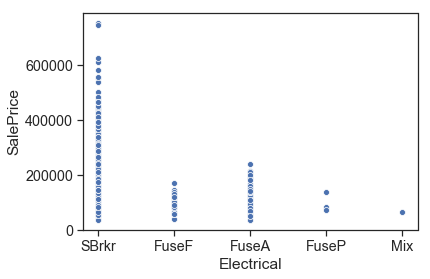

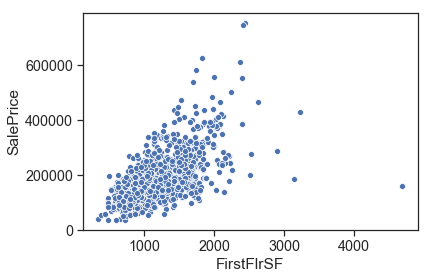

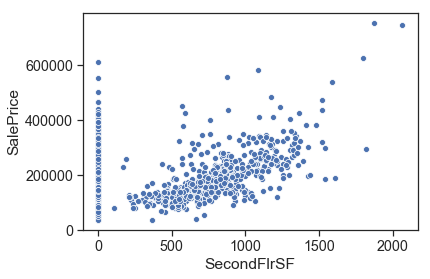

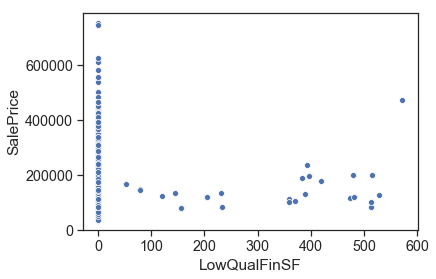

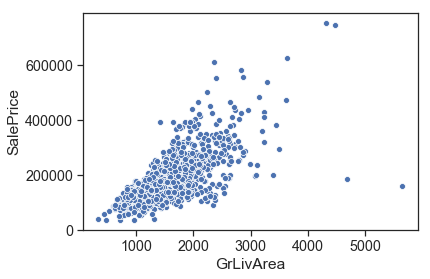

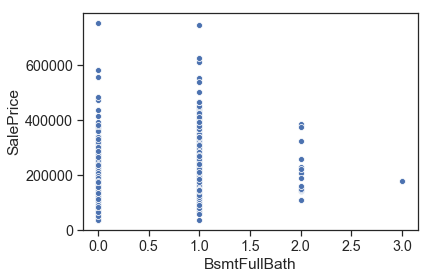

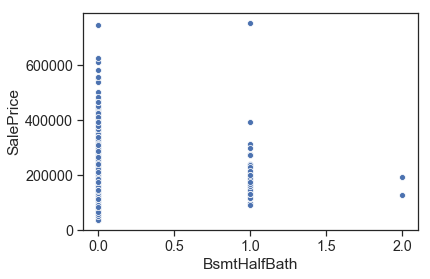

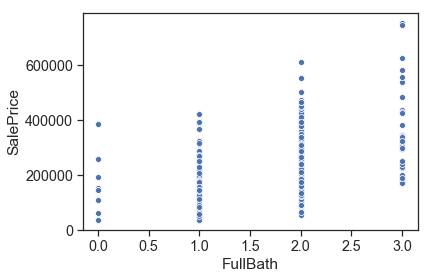

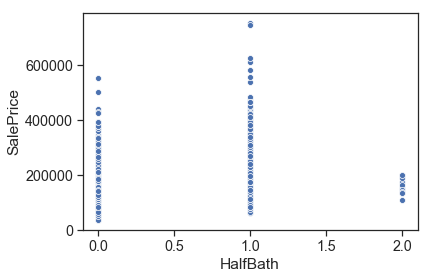

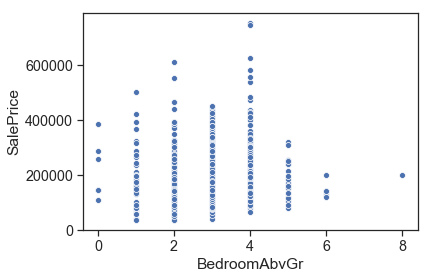

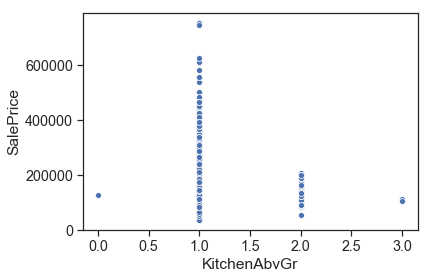

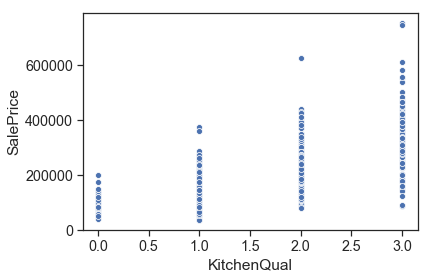

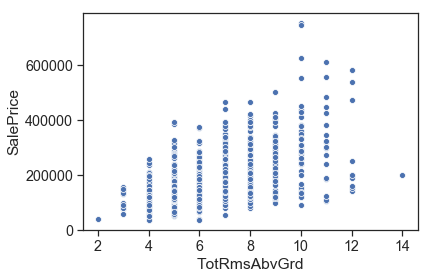

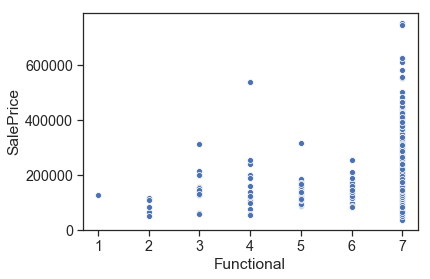

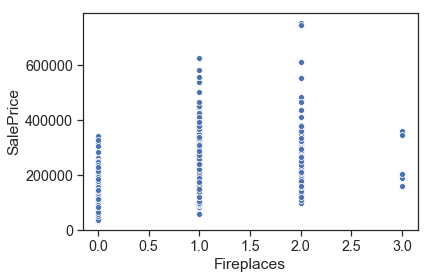

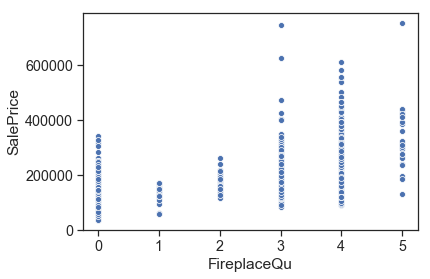

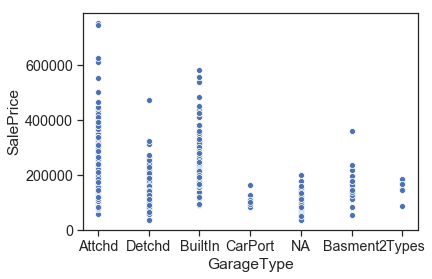

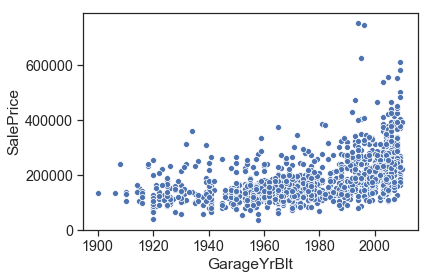

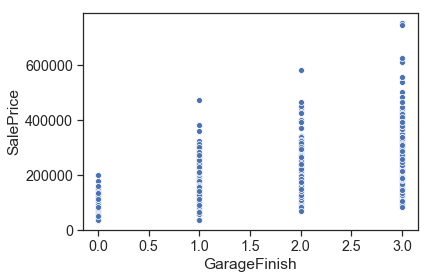

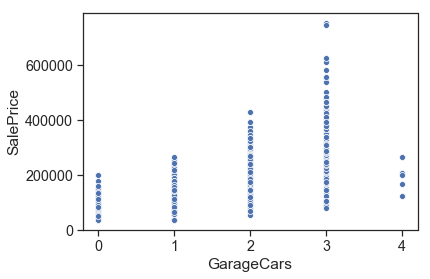

In [34]:
for i in range(0,my_cols.shape[1]):
    plt.figure(i)
    sns.scatterplot(x = my_cols.iloc[:,i], y = saleprice)

In [ ]:
# List columns with type object
# objs = houses.select_dtypes(include=['object']).dtypes
# objs = [re.sub(" *object","",s) for s in objs.index]
# objs

## Encode Vars

In [50]:
# Create dummy cols when necessary - for the moment drop GarageYrBlt bc it contains nulls
X = pd.get_dummies(houses.drop('SalePrice',axis=1).drop('GarageYrBlt',axis=1), drop_first=True, dummy_na=True)
y = houses.SalePrice
print("X:",X.shape)
print("Y:",y.shape)
# X.dtypes

X: (1459, 261)
Y: (1459,)


In [68]:
# feature_importance = list(zip(X.columns[:-2], randomForest.feature_importances_))
# dtype = [('feature', 'S10'), ('importance', 'float')]
# feature_importance = np.array(feature_importance, dtype=dtype)
# feature_sort = np.sort(feature_importance, order='importance')[::-1]
# feature_sort

In [69]:
## The first 10 most important features are:
# [i for (i, j) in feature_sort[0:10]]

In [70]:
# randomForest.oob_score_

## Test using method from tutorial

https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

https://towardsdatascience.com/improving-random-forest-in-python-part-1-893916666cd

### Create features (X) and labels (Y) series

In [72]:
# FEATURES
# Create dummy cols when necessary - for the moment drop GarageYrBlt bc it contains nulls
features = pd.get_dummies(houses.drop('SalePrice',axis=1).drop('GarageYrBlt',axis=1), drop_first=True, dummy_na=True)
feature_list = list(features.columns) # Saving feature names for later use
features = np.array(features)         # Convert to numpy array

# LABELS (Response Variable)
labels = houses.SalePrice

### Create Training and Test Sets

In [74]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets (80:20)
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.2)

In [94]:
# Is everything the right size so far?
# print('Training Features Shape:', train_features.shape)
# print('Training Labels Shape:', train_labels.shape)
# print('Testing Features Shape:', test_features.shape)
# print('Testing Labels Shape:', test_labels.shape)

### Train a Model

In [95]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000)

# Train the model on training data
rf.fit(train_features, train_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [98]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 17356.36


In [99]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 89.54 %.


### Look at Feature Importances

In [146]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 5)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: OverallQual          Importance: 0.57274
Variable: GrLivArea            Importance: 0.10073
Variable: SecondFlrSF          Importance: 0.04506
Variable: TotalBsmtSF          Importance: 0.03108
Variable: BsmtFinSF1           Importance: 0.02345
Variable: GarageCars           Importance: 0.02039
Variable: FirstFlrSF           Importance: 0.01966
Variable: GarageArea           Importance: 0.0164
Variable: LotArea              Importance: 0.01614
Variable: FullBath             Importance: 0.0138
Variable: YearBuilt            Importance: 0.01136
Variable: YearRemodAdd         Importance: 0.00817
Variable: TotRmsAbvGrd         Importance: 0.00757
Variable: MasVnrArea           Importance: 0.00746
Variable: LotFrontage          Importance: 0.00628
Variable: FireplaceQu          Importance: 0.00565
Variable: BsmtUnfSF            Importance: 0.00557
Variable: WoodDeckSF           Importance: 0.00528
Variable: OpenPorchSF          Importance: 0.0049
Variable: KitchenQual          Imp

In [147]:
# New random forest with only the two most important variables
rf_most_important = RandomForestRegressor(n_estimators= 1000)
# Extract the most important features
important_indices = [feature_list.index('OverallQual'), feature_list.index('GrLivArea'),
                     feature_list.index('SecondFlrSF'), feature_list.index('TotalBsmtSF'), 
                     feature_list.index('LotArea'), feature_list.index('BsmtFinSF1'),
                     feature_list.index('FirstFlrSF'),feature_list.index('GarageCars'),
                     feature_list.index('GarageArea'), feature_list.index('LotFrontage'),
                     feature_list.index('YearBuilt'),feature_list.index('YearRemodAdd'),
                     feature_list.index('MasVnrArea'),feature_list.index('BsmtUnfSF'),
                     feature_list.index('FullBath'),feature_list.index('TotRmsAbvGrd'),
                     feature_list.index('FireplaceQu'),feature_list.index('WoodDeckSF')]

train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]
# Train the random forest
rf_most_important.fit(train_important, train_labels)

# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)
errors = abs(predictions - test_labels)

# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2))
mape = np.mean(100 * (errors / test_labels))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%')

Mean Absolute Error: 18340.27
Accuracy: 89.09 %


Text(0.5,1,'Variable Importances')

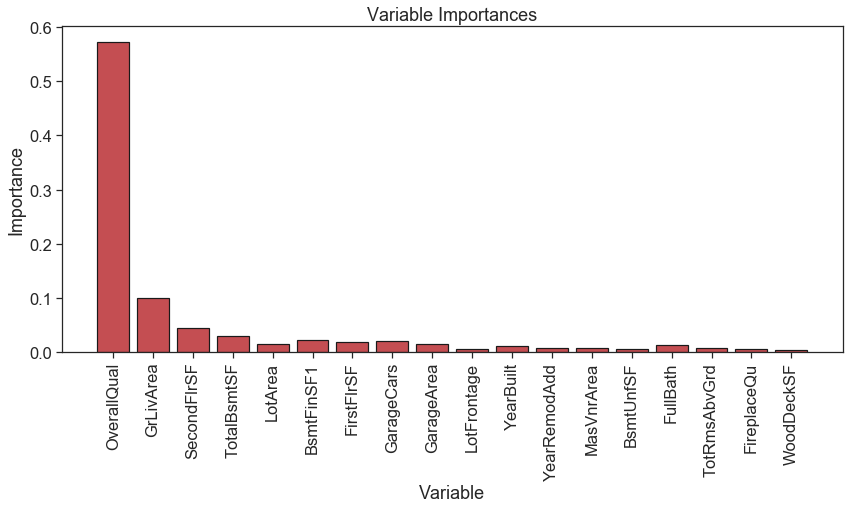

In [148]:
# Plot variable importances
x_values = []
y_values = []
for i in important_indices:
    x_values.append(feature_list[i])
    y_values.append(importances[i])
# Make a bar chart
plt.figure(figsize=fs)
plt.bar(x_values, y_values, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2, )
# Tick labels for x axis
plt.xticks(x_values, x_values, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance')
plt.xlabel('Variable')
plt.title('Variable Importances')